In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random
random.seed(42)

%matplotlib inline

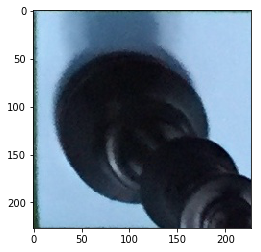

In [2]:
image = cv2.imread('H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\train\\bk\\0646_63.jpg') 
plt.imshow(image)

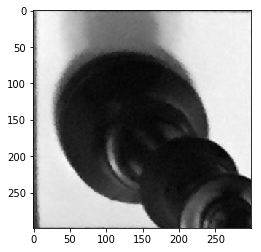

In [3]:
height, width = image.shape[:2]
resized_image = cv2.resize(image, (299, 299), interpolation = cv2.INTER_AREA)
# plt.imshow(resized_image)
gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [4]:
def get_image_intensity_histogram(img):
    resized_image = cv2.resize(image, (200, 200), interpolation = cv2.INTER_AREA)
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    return np.squeeze(hist)
    

In [5]:
def get_features_labels(data_path):
    X, y = [], []
    features_with_labels = []
    for fol in os.listdir(data_path):
        if ((fol[0] == "b") or (fol[0] == "w")):
            fol_path = os.path.join(data_path, fol)
            for file in os.listdir(fol_path):
                if ".jpg" in file:

                    if fol[0] == "b":
                        label = 0
                    else:
                        label = 1

                    complete_file_loc = os.path.join(fol_path, file)
                    features_with_labels.append({"feature": get_image_intensity_histogram(complete_file_loc), "label": label})
                    
    random.shuffle(features_with_labels)
    #print(X[0][0])
    #print(X[0][1])
    X = [x["feature"] for x in features_with_labels]
    y = [x["label"] for x in features_with_labels]

    return np.array(X), np.array(y)

In [6]:
X_train, y_train = get_features_labels("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\train")
X_test, y_test = get_features_labels("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\test")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6899, 256)
(6899,)
(185, 256)
(185,)


(array([3424.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3475.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

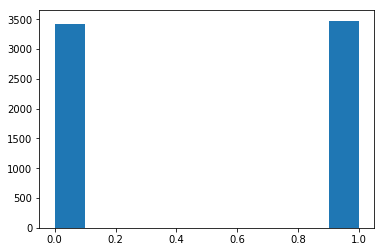

In [7]:
plt.hist(y_train)

(array([90.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 95.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

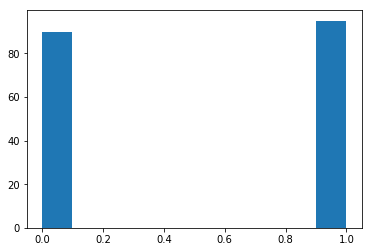

In [8]:
plt.hist(y_test)

In [9]:
y_train[:100]

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0])

In [10]:
y_test[:100]

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [11]:
num_training_records = X_train.shape[0]

In [12]:
y_train[:20]

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0])

In [13]:
X_train[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 2.000e+00, 3.000e+00, 8.000e+00, 2.900e+01, 1.310e+02,
       3.110e+02, 5.750e+02, 8.410e+02, 1.033e+03, 1.197e+03, 1.181e+03,
       1.063e+03, 8.730e+02, 7.170e+02, 5.660e+02, 5.740e+02, 5.360e+02,
       5.280e+02, 5.410e+02, 4.870e+02, 4.220e+02, 3.890e+02, 4.010e+02,
       4.400e+02, 4.490e+02, 4.280e+02, 4.050e+02, 3.360e+02, 3.010e+02,
       2.660e+02, 2.440e+02, 2.050e+02, 1.940e+02, 1.960e+02, 1.780e+02,
       1.640e+02, 1.500e+02, 1.710e+02, 1.620e+02, 1.550e+02, 1.460e+02,
       1.380e+02, 1.680e+02, 1.610e+02, 1.570e+02, 1.000e+02, 9.600e+01,
       1.110e+02, 1.120e+02, 8.500e+01, 9.200e+01, 9.700e+01, 9.600e+01,
       1.070e+02, 1.150e+02, 9.600e+01, 1.000e+02, 8.400e+01, 8.300e+01,
       6.900e+01, 7.200e+01, 7.800e+01, 7.700e+01, 8.400e+01, 8.300e+01,
       5.200e+01, 7.300e+01, 7.700e+01, 7.700e+01, 9.000e+01, 1.020e+02,
       8.600e+01, 8.200e+01, 9.500e+01, 9.300e+01, 

In [28]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## XGBoost does not require feature scaling [Refer](https://stats.stackexchange.com/questions/353462/what-are-the-implications-of-scaling-the-features-to-xgboost)

In [14]:
X_concat = np.append(X_train, X_test, axis=0)
print(X_concat.shape)


#min_max_scaler = MinMaxScaler()
#X_concat_scaled = min_max_scaler.fit_transform(X_concat)
#X_concat_scaled = preprocessing.scale(X_concat)
#X_concat_scaled = X_concat

#print(X_concat_scaled.shape)

#X_train = X_concat_scaled[:num_training_records, :]
#X_test = X_concat_scaled[num_training_records:, :]

#print(X_train.shape)
#print(X_test.shape)

(7084, 256)


In [15]:
import xgboost as xgb

gbm = xgb.XGBClassifier(max_depth=5, n_estimators=1000, learning_rate=0.05, objective= 'binary:logistic').fit(X_train, y_train)
y_test_prections = gbm.predict(X_test)
y_train_predictions = gbm.predict(X_train)
print(y_test_prections.shape)


(185,)


G:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
G:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [16]:
y_test_prections

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
import itertools
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 0 90]
 [ 0 95]]


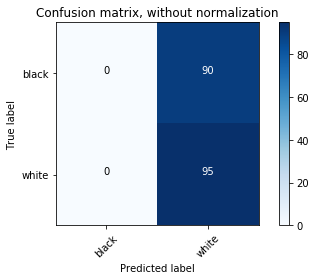

In [18]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_prections)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["black", "white"],
                      title='Confusion matrix, without normalization')

In [19]:
print(precision_recall_fscore_support(y_test, y_test_prections))
print(accuracy_score(y_test, y_test_prections))

(array([0.  , 0.51]), array([0., 1.]), array([0.  , 0.68]), array([90, 95], dtype=int64))
0.5135135135135135


G:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
def generate_performance_results(actual, predicted):
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(actual, predicted)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["black", "white"], title='Confusion matrix, without normalization')
    
    print("Precision, recall, F score and support (per class): ")
    print(precision_recall_fscore_support(actual, predicted))
    print("Accuracy")
    print(accuracy_score(actual, predicted))

In [21]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20000, max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_train)
generate_performance_results(y_train, y_predicted)

In [ ]:
clf.feature_importances_